In [1]:
#Load a specific lightcurve file for testing purposes
import json
import sys
import numpy as np
import emcee
import george
import matplotlib.pyplot as plt
sys.path.append('../classification')
sys.path.append('../gen_lightcurves')
import bandMap
import Antares_object
import os
filenames = ['../gen_lightcurves/gp_smoothed/SN2005el_gpsmoothed.json','../gen_lightcurves/gp_smoothed/SDSS-II SN 18165_gpsmoothed.json',
            '../gen_lightcurves/gp_smoothed/SN2004dj_gpsmoothed.json']

file_data = {}

for filename in filenames:
    with open(filename, 'r') as f:
         temp_file_data = json.load(f)
    print(temp_file_data.keys())
    for key in temp_file_data:
        file_data[key] = temp_file_data[key]


dict_keys(['B_', 'B__CSP', 'B_kait3', 'H_PAIRITEL', 'H__CSP', 'I_kait3', 'J_PAIRITEL', 'J__CSP', 'Ks_PAIRITEL', 'R_kait3', 'U_', 'V_', 'V__CSP', 'V_kait3', 'Y__CSP', 'g__CSP', 'i__CSP', 'r__CSP', 'u__CSP'])
dict_keys(['gprime_SDSS_SDSS', 'rprime_SDSS_SDSS'])
dict_keys(['B_', 'I_', 'R_', 'U_', 'V_'])


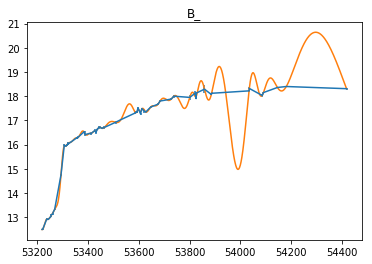

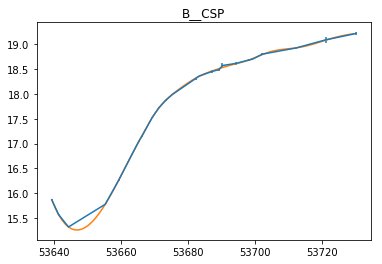

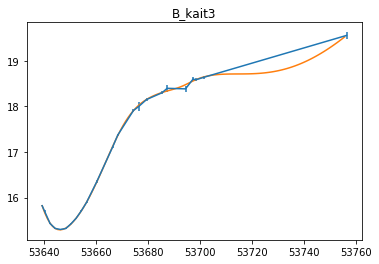

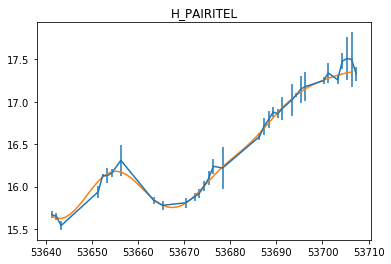

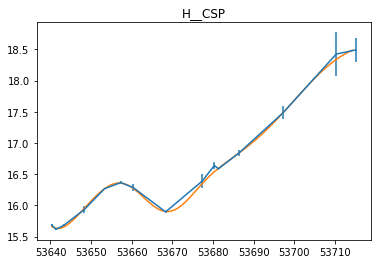

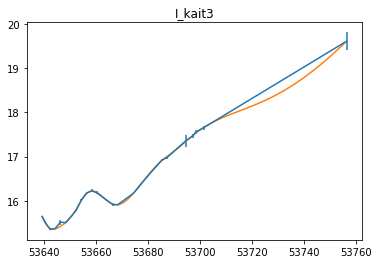

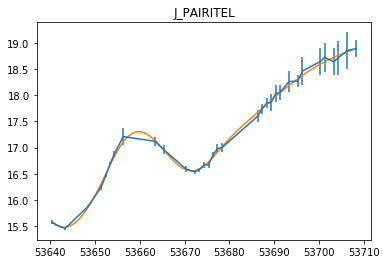

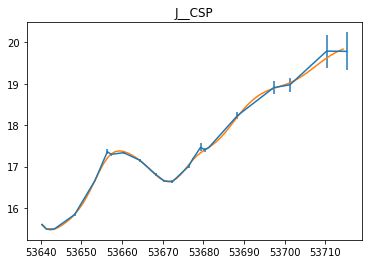

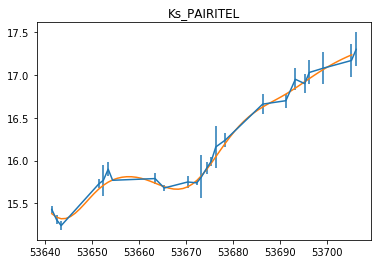

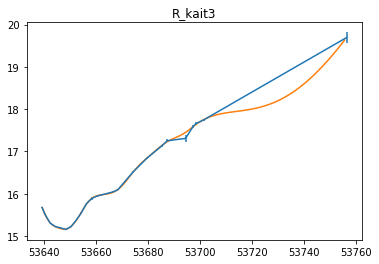

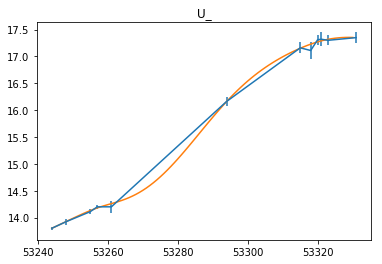

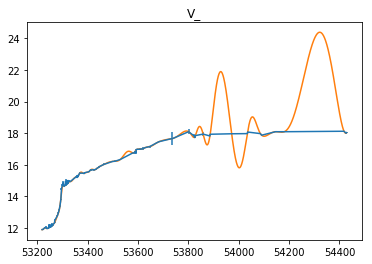

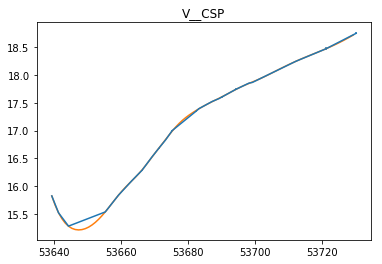

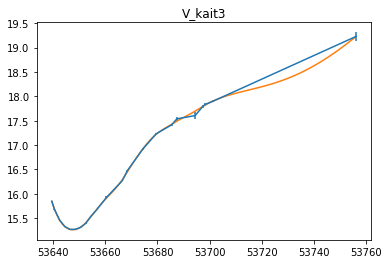

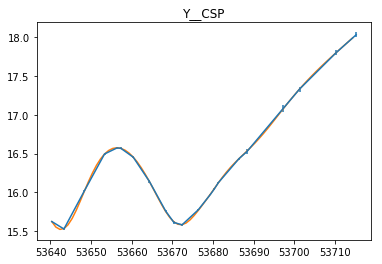

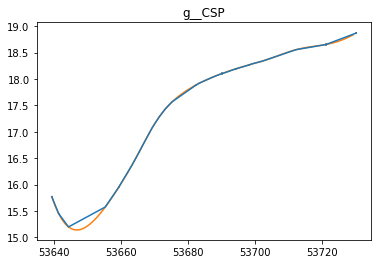

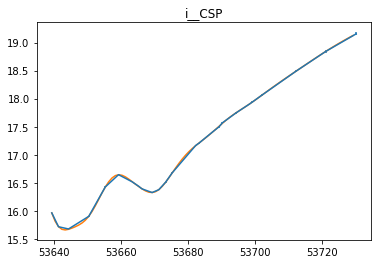

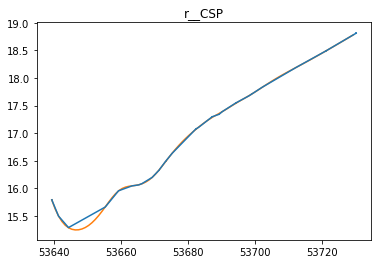

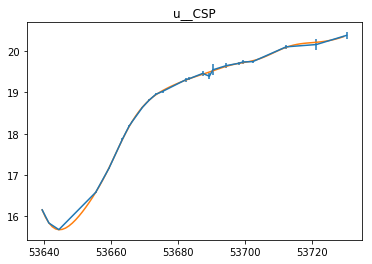

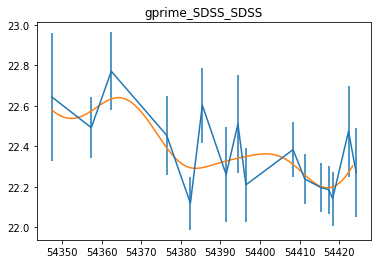

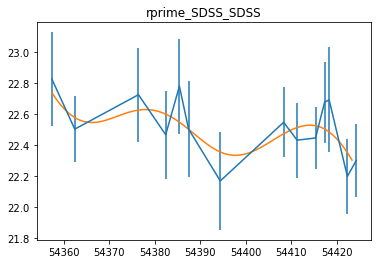

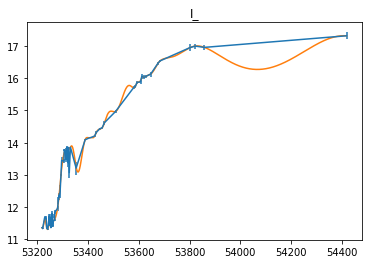

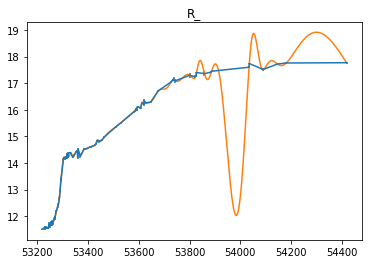

In [2]:
for filt in file_data:
    mjd = np.array(file_data[filt]['mjd'])
    mag = np.array(file_data[filt]['mag'])
    magerr = np.array(file_data[filt]['dmag'])
    modelmjd = file_data[filt]['modeldate']
    modelmag = file_data[filt]['modelmag']
    
    plt.errorbar(mjd,mag,yerr=magerr)
    plt.plot(modelmjd, modelmag)
    plt.title(filt)
    plt.show()

In [ ]:
for filt in file_data:
    thisjd = np.array(file_data[filt]['mjd'])
    mag = np.array(file_data[filt]['mag'])
    magerr = np.array(file_data[filt]['dmag'])
    
    temp_passband = np.array([filt] * len(thisjd))
    mag_subtracted = thismag - orig_val_bspline
    #print("Orig_val_bspline: ", orig_val_bspline)
    #print("Mag sub: ", mag_subtracted)
    tobj_subtracted = Antares_object.TouchstoneObject(objname, thisjd, mag_subtracted, thisdmag, temp_passband)
    outgp_subtracted = tobj_subtracted.gaussian_process_alt_smooth(per = False, scalemin=np.log(25.), scalemax=np.log(5000.), minobs=10)
    #Since I only gave it values for a single filter, the output will only have one filter in the dictionary
    thisgp_subtracted, _, thismag_subtracted, _ = outgp_subtracted[filt]
    thismod_subtracted, modcovar_subtracted = thisgp_subtracted.predict(thismag_subtracted, mod_dates)
    thiserr_subtracted = np.sqrt(np.diag(modcovar_subtracted))